In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymc3 as pm
import theano.tensor as tt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
dist_0 = {'loc':-2, 'scale':1, 'size':167}
dist_1 = {'loc':0, 'scale':1, 'size':167}
dist_2 = {'loc':2, 'scale':1, 'size':166}
dists = [dist_0,dist_1,dist_2]

In [4]:
observed_data = np.concatenate([np.random.normal(**params) for params in dists])

In [5]:
obs_df = pd.DataFrame({'value':observed_data})
obs_df.loc[:167,'true_cluster'] = 0
obs_df.loc[167:167*2,'true_cluster'] = 1
obs_df.loc[167*2:,'true_cluster'] = 2

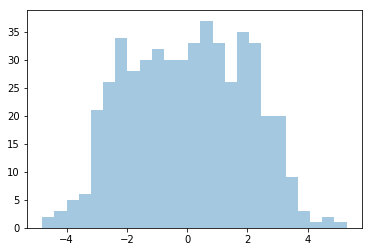

In [6]:
sns.distplot(observed_data, kde=False, bins=25)

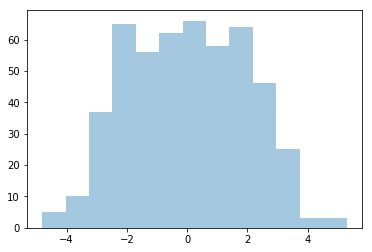

In [7]:
sns.distplot(observed_data, kde=False)

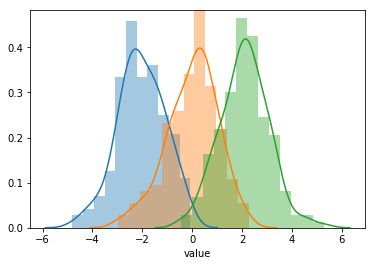

In [8]:
ax = sns.distplot(obs_df.loc[obs_df.true_cluster==0,'value'])
ax = sns.distplot(obs_df.loc[obs_df.true_cluster==1,'value'], ax=ax)
ax = sns.distplot(obs_df.loc[obs_df.true_cluster==2,'value'], ax=ax)

Fit a bayesian mixture model with 2 distributions

In [106]:
with pm.Model() as model:
    p1 = pm.Uniform('p_cat',0,1)
    p2 = 1 - p1
    
    p = tt.stack([p1,p2])
    assignment = pm.Categorical("assignment", p, 
                            shape=observed_data.shape[0],
                            testval=np.random.randint(0, 2, observed_data.shape[0]))
    sds = pm.Uniform("sds", 0, 10, shape=2)
    mus = pm.Normal("means", mu=np.array([-2, 1.5]), sd=np.array([10,10]), shape=2)
    mu_i = pm.Deterministic('mean_i', mus[assignment])
    sd_i = pm.Deterministic('sd_i', sds[assignment])
    data_points = pm.Normal("data",mu=mu_i, sd=sd_i, observed=observed_data)

In [107]:
with model:
    step1 = pm.Metropolis(vars=[p, sds, mus])
    step2 = pm.ElemwiseCategorical(vars=[assignment])
    trace = pm.sample(25000, step=[step1, step2])

/Users/johannes.harkins/anaconda/envs/mixture-model/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: ElemwiseCategorical is deprecated, switch to CategoricalGibbsMetropolis.
  app.launch_new_instance()
100%|██████████| 25000/25000 [04:12<00:00, 99.00it/s] 


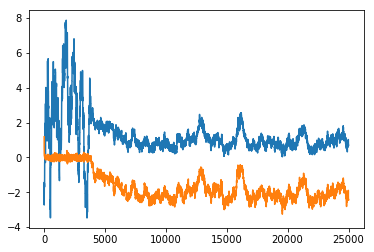

In [108]:
plt.plot(trace['means'])

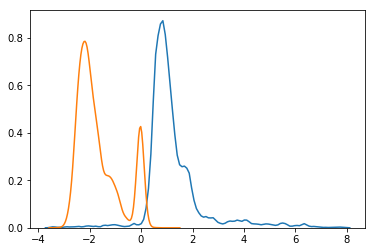

In [109]:
ax = sns.distplot(trace['means'][:,0], hist=False)
ax = sns.distplot(trace['means'][:,1], hist=False, ax=ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x152104b00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x18ef3d6d8>]], dtype=object)

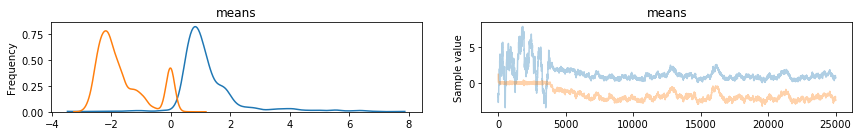

In [110]:
pm.plots.traceplot(trace=trace, varnames=['means'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x188b542b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x18f24f630>]], dtype=object)

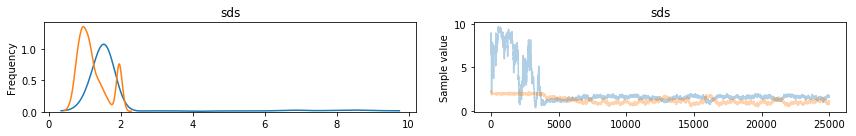

In [111]:
pm.plots.traceplot(trace=trace, varnames=['sds'])

Model with 3 distributions

In [112]:
with pm.Model() as model_three:
    p = pm.Dirichlet('p_cat',a= np.array([1,1,1]), shape=3)
    assignment = pm.Categorical("assignment", p, 
                            shape=observed_data.shape[0],
                            testval=np.random.randint(0, 3, observed_data.shape[0]))

In [113]:
with model_three:
    sds = pm.Uniform("sds", 0, 10, shape=3)
    mus = pm.Normal("means", mu=np.array([-2, 0, 2]), sd=np.array([10,10,10]), shape=3)
    mu_i = pm.Deterministic('mean_i', mus[assignment])
    sd_i = pm.Deterministic('sd_i', sds[assignment])
    data_points = pm.Normal("data",mu=mu_i, sd=sd_i, observed=observed_data)

In [114]:
with model_three:
    step1 = pm.Metropolis(vars=[p, sds, mus])
    step2 = pm.ElemwiseCategorical(vars=[assignment])
    trace = pm.sample(25000, step=[step1, step2])

/Users/johannes.harkins/anaconda/envs/mixture-model/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: ElemwiseCategorical is deprecated, switch to CategoricalGibbsMetropolis.
  app.launch_new_instance()
100%|██████████| 25000/25000 [04:11<00:00, 99.49it/s] 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1676979e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116568c88>]], dtype=object)

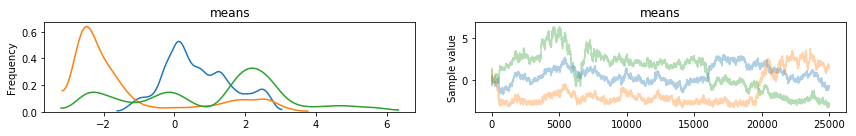

In [115]:
pm.plots.traceplot(trace=trace, varnames=['means'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x187ee5cc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x186985cc0>]], dtype=object)

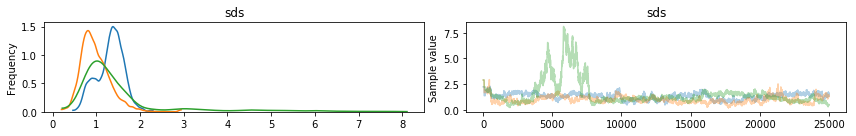

In [116]:
pm.plots.traceplot(trace=trace, varnames=['sds'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1869939b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x151da3e80>]], dtype=object)

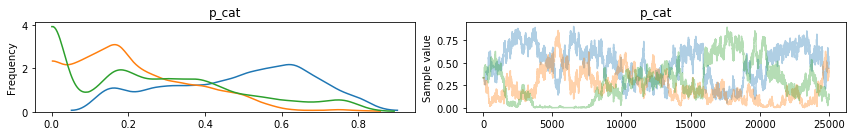

In [117]:
pm.plots.traceplot(trace=trace, varnames=['p_cat'])

Model with 4 distributions

In [9]:
with pm.Model() as model_four:
    p = pm.Dirichlet('p_cat',a= np.array([1,1,1,1]), shape=4)
    assignment = pm.Categorical("assignment", p, 
                            shape=observed_data.shape[0],
                            testval=np.random.randint(0, 4, observed_data.shape[0]))

In [10]:
with model_four:
    sds = pm.Uniform("sds", 0, 10, shape=4)
    mus = pm.Normal("means", mu=np.array([-2.5, -1, 1, 2]), sd=np.array([10,10,10,10]), shape=4)
    mu_i = pm.Deterministic('mean_i', mus[assignment])
    sd_i = pm.Deterministic('sd_i', sds[assignment])
    data_points = pm.Normal("data",mu=mu_i, sd=sd_i, observed=observed_data)

In [11]:
with model_four:
    step1_four = pm.Metropolis(vars=[p, sds, mus])
    step2_four = pm.ElemwiseCategorical(vars=[assignment])
    trace_four = pm.sample(25000, step=[step1_four, step2_four])

/Users/johannes.harkins/anaconda/envs/mixture-model/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: ElemwiseCategorical is deprecated, switch to CategoricalGibbsMetropolis.
  app.launch_new_instance()
100%|██████████| 25000/25000 [04:45<00:00, 87.43it/s] 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c228cc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12e3d0588>]], dtype=object)

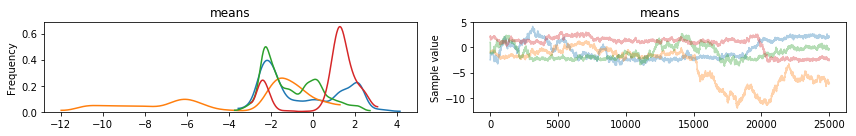

In [12]:
pm.plots.traceplot(trace=trace_four, varnames=['means'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e7015f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12e750208>]], dtype=object)

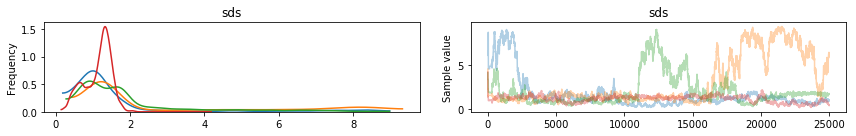

In [13]:
pm.plots.traceplot(trace=trace_four, varnames=['sds'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a1a92e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12ebed6d8>]], dtype=object)

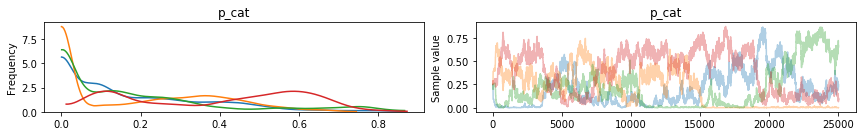

In [14]:
pm.plots.traceplot(trace=trace_four, varnames=['p_cat'])